# Notebook #6: SLA / Threshold

Este notebook tem como objetivo definir limites operacionais de entrega com o objetivo de equilibrar custo logístico e experiência do cliente, buscando a partir de quantos dias que começa a haver degradção significativa na experiência do cliente.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#### Métrica de satisfação:

Satisfação aqui medida como reviews com 4 estrelas ou mais.

In [9]:
df = pd.read_csv('../data/processed/olist_clean.csv')

df['is_satisfied'] = (df['review_score'] >= 4).astype(int)

#### Agrupando e filtrando valores discrepantes:

In [10]:
grouped = (
    df.groupby('delivery_time_days')
    .agg(
        avg_review = ('review_score', 'mean'),
        satisfaction_rate = ('is_satisfied', 'mean'),
        n_orders = ('order_id', 'count')
    )
    .reset_index()
)

grouped = grouped[grouped['n_orders'] >= 30]

#### Montagem de gráfico que visualiza como é a média das reviews dependendo do tempo de entrega:

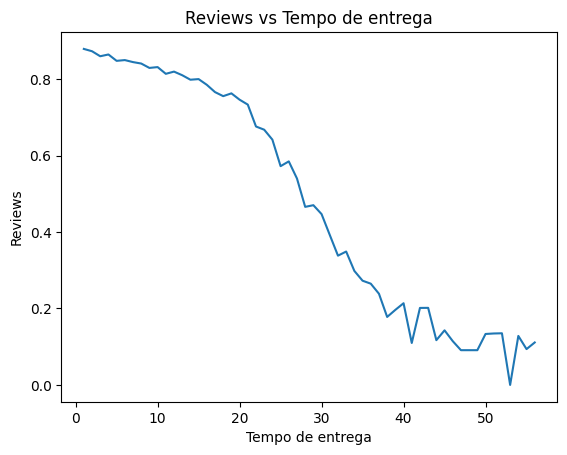

In [11]:
plt.figure()

plt.plot(grouped['delivery_time_days'], grouped['satisfaction_rate'])
plt.xlabel('Tempo de entrega')
plt.ylabel('Reviews')
plt.title('Reviews vs Tempo de entrega')
plt.show()

#### Insight tirado da análise:

Revela-se abaixo que a satisfação do cliente passa cair para menos de 70% após 22 dias de entrega. Isso significa que esse deveria ser o tempo limite que o produto deve ser entregue para evitar baixar significativamente a experiência do cliente (Tendo em mente que isso poderia mudar dependendo da data de entrega prevista e da expectativa dele.)

In [13]:
threshold = grouped[grouped['satisfaction_rate'] < 0.7]['delivery_time_days'].min()
threshold

np.float64(22.0)

## Conclusão

O insight permite verificar qual a quantidade de dias máximo que o produto deve ser entregue ao cliente. Isso pode ser muito útil pois não sobrecarrega nem supercusteia a empresa para que todas as entregas sejam extremamente rápidas, ao invés disso encontra um balanceamento onde a empresa tem uma flexibilidade maior e o cliente, na maior parte, se mantém satisfeto.